Load the `ISLR2` and `tidyverse` packages.

In [12]:
library(ISLR2)
library(tidyverse)


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

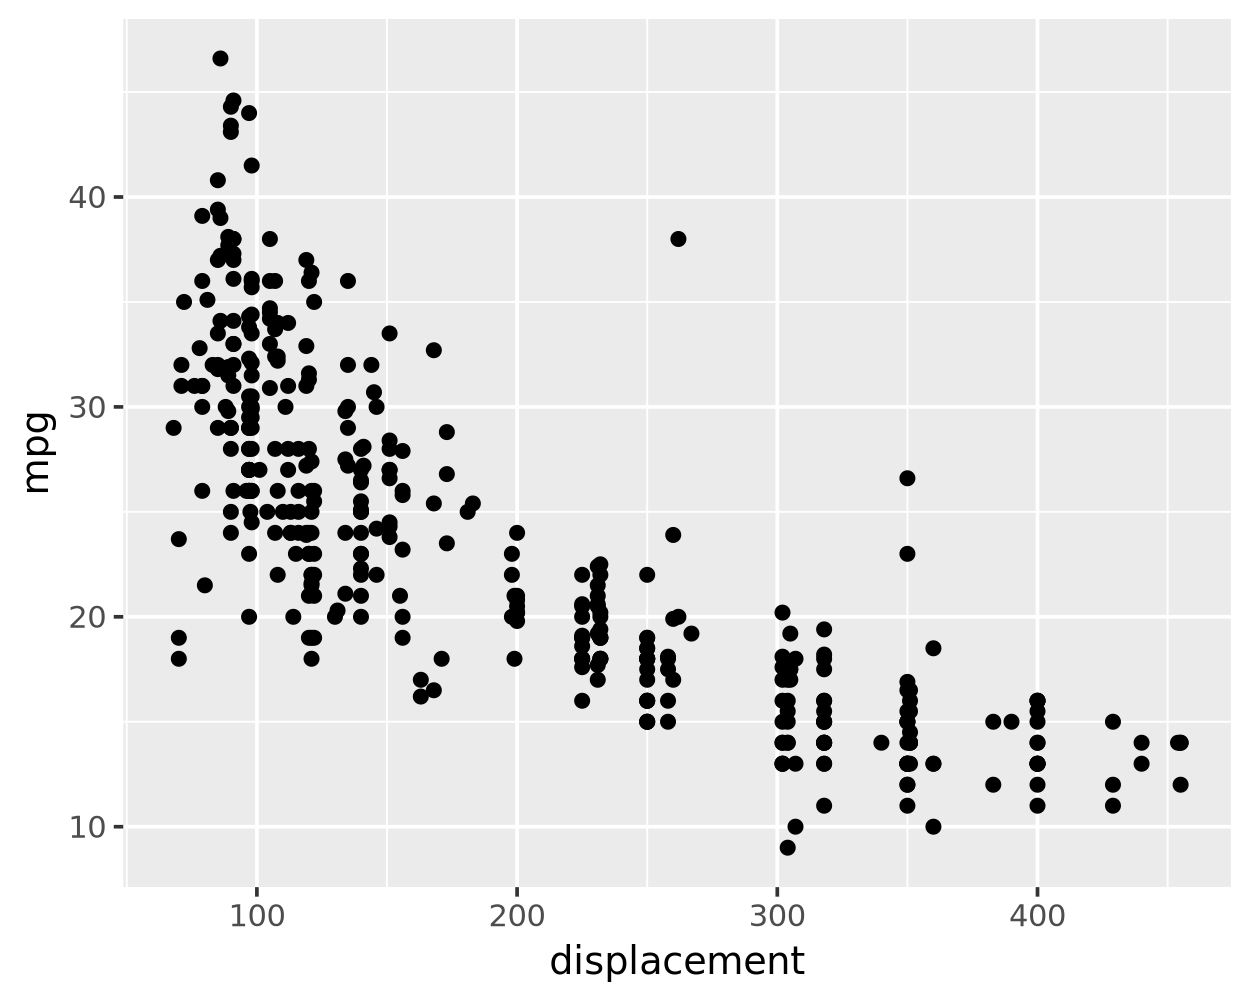

In [9]:
ggplot(Auto, aes(x = displacement, y = mpg)) +
  geom_point()

❓Does the relationship of `mpg` to `displacement` look linear?

The relationship does not seem to be linear since the trend looks to have more of a curve then a straight line, which could indicate a exponential relationship.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

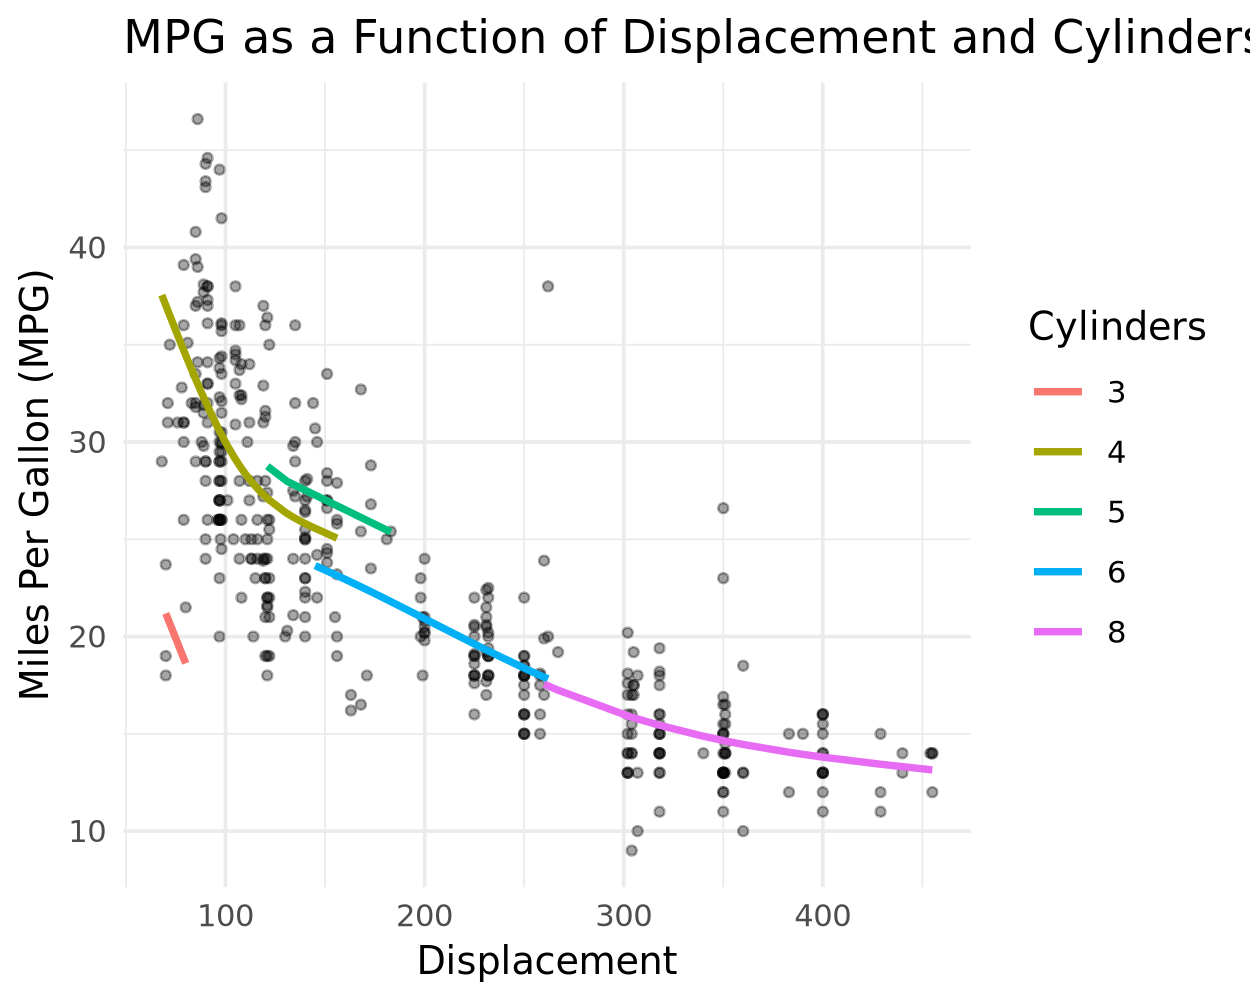

In [22]:
library(tidymodels)

#Set up the recipe
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) %>%
  step_mutate(cyl_cat = factor(cylinders)) %>% 
  step_dummy(cyl_cat) %>%
  step_rm(cylinders) %>%
  step_ns(displacement, deg_free = 4)  

rec_prepped <- rec %>%
  prep(data = Auto)

mod_spec <- linear_reg() %>%
  set_engine("lm")

#Create the workflow
workflow <- workflow() %>%
  add_recipe(rec) %>%
  add_model(mod_spec)

#Fit the model
mod_fit <- workflow %>%
  fit(data = Auto)

#Predict using the fitted model and the original dataset
Auto_pred <- predict(mod_fit, new_data = Auto) %>%
  bind_cols(Auto)

#Visualize the predictions
ggplot(Auto_pred, aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
  labs(title = "MPG as a Function of Displacement and Cylinders",
       x = "Displacement",
       y = "Miles Per Gallon (MPG)",
       color = "Cylinders") +
  theme_minimal()